### Loading Libraries

In [238]:
import numpy as np
import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

### Cleaning Data

#### Loading data and creating a copy of the data frame to work with

In [2]:
df_raw = pd.read_csv("C:/Users/tomas/OneDrive/Plocha/GooglePlayStoreApps_Analysis/googleplaystore.csv")
df = df_raw.copy()
print(df.columns)
df

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### Dropping columns that will not be used in EDA

In [3]:
df = df.drop(['Size', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,Art & Design;Creativity


#### Examining incorrectly inserted values

In [4]:
print("Unique values for 'Content Rating':\n")
print(df['Content Rating'].unique())
# 'Row 10472 has incorrectly inserted values'
df.sort_values('Price', ascending=False).head(2)
# We do not know the number of reviews so the best is to drop the column 

Unique values for 'Content Rating':

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'
 nan]


,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,Free,0,Everyone,NaN,"February 11, 2018"
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,Art & Design


#### Dropping missing values

In [5]:
print('Missing values in columns:\n')
print(df.isna().sum())
print('_____________________________________\n')
df = df.dropna()
df.info()

Missing values in columns:

App                  0
Category             0
Rating            1474
Reviews              0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64
_____________________________________

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Installs        9366 non-null   object 
 5   Type            9366 non-null   object 
 6   Price           9366 non-null   object 
 7   Content Rating  9366 non-null   object 
 8   Genres          9366 non-null   object 
dtypes: float64(1), object(8)
memory usage: 731.7+ KB


In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Installs        9366 non-null   object 
 5   Type            9366 non-null   object 
 6   Price           9366 non-null   object 
 7   Content Rating  9366 non-null   object 
 8   Genres          9366 non-null   object 
dtypes: float64(1), object(8)
memory usage: 731.7+ KB


#### Dropping duplicate App names
There are many apps that appeared multiple times in the dataset

In [7]:
df = df.drop_duplicates(subset=['App'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   object 
 4   Installs        8196 non-null   object 
 5   Type            8196 non-null   object 
 6   Price           8196 non-null   object 
 7   Content Rating  8196 non-null   object 
 8   Genres          8196 non-null   object 
dtypes: float64(1), object(8)
memory usage: 640.3+ KB


#### Removing '+' and ',' from 'Installs' column

In [8]:
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')
df.head()

C:\Users\tomas\AppData\Local\Temp\ipykernel_7824\1556284288.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0,Everyone,Art & Design;Creativity


#### Removing '$' sign from 'Price' column

In [9]:
df['Price'] = df['Price'].str.replace('$','')
df['Price'].unique()

C:\Users\tomas\AppData\Local\Temp\ipykernel_7824\3315532784.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

#### Corecting datatypes

In [10]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
dtype: object

In [11]:
df['Reviews'] = df['Reviews'].astype('int')
df['Installs'] = df['Installs'].astype('int')
df['Price'] = df['Price'].astype('float')
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object

#### Cleaned data frame

In [12]:
df

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,500,Free,0.0,Everyone,Education
10836,Sya9a Maroc - FR,FAMILY,4.5,38,5000,Free,0.0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,100,Free,0.0,Everyone,Education
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,1000,Free,0.0,Mature 17+,Books & Reference


#### Exporting cleaned data frame to csv

In [64]:
df.to_csv('GoogleApps_Cleaned.csv', index=False)

### Exploratory Data Analysis

#### Finding top 10 apps

In [13]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity


### Finding the top 10 apps

In [14]:
df.sort_values('Rating', ascending=False).head(10)
# sorting by rating

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
5685,Jobs in Canada - Emplois au Canada,BUSINESS,5.0,2,1000,Free,0.00,Teen,Business
7164,CD CHOICE TUBE,FAMILY,5.0,10,500,Free,0.00,Everyone,Entertainment
7195,CE Smart,TOOLS,5.0,3,100,Free,0.00,Everyone,Tools
7204,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1,100,Paid,4.99,Everyone,Education
9341,EG India,LIFESTYLE,5.0,3,100,Free,0.00,Everyone,Lifestyle
8063,cx advance call blocker,PERSONALIZATION,5.0,3,50,Free,0.00,Everyone,Personalization
7212,MCQ CE IT,FAMILY,5.0,22,1000,Free,0.00,Everyone,Education
8058,Oración CX,LIFESTYLE,5.0,103,5000,Free,0.00,Everyone,Lifestyle
9365,Eh Bee Wallpapers HD,PERSONALIZATION,5.0,4,100,Free,0.00,Everyone,Personalization
7239,CF Life,FAMILY,5.0,4,100,Free,0.00,Everyone,Education


In [15]:
df[df['Rating'] == 5.0].sum()
# there is 1355 apps with 5 star rating, so we need to add another sorting criteria

App               Hojiboy Tojiboyev Life HacksAmerican Girls Mob...
Category          COMICSDATINGDATINGDATINGDATINGDATINGDATINGEVEN...
Rating                                                       1355.0
Reviews                                                        2384
Installs                                                      88823
Type              FreeFreeFreeFreeFreeFreeFreeFreeFreeFreeFreePa...
Price                                                        102.03
Content Rating    EveryoneMature 17+Mature 17+TeenMature 17+Matu...
Genres            ComicsDatingDatingDatingDatingDatingDatingEven...
dtype: object

In [16]:
df.sort_values(['Installs', 'Rating'], ascending=False).head(10)
# selecting top 10 apps based on the nummber of installs and ratting

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
1654,Subway Surfers,GAME,4.5,27722264,1000000000,Free,0.0,Everyone 10+,Arcade
2545,Instagram,SOCIAL,4.5,66577313,1000000000,Free,0.0,Teen,Social
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,1000000000,Free,0.0,Everyone,Photography
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1000000000,Free,0.0,Everyone,Communication
3234,Google,TOOLS,4.4,8033493,1000000000,Free,0.0,Everyone,Tools
3454,Google Drive,PRODUCTIVITY,4.4,2731171,1000000000,Free,0.0,Everyone,Productivity
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,1000000000,Free,0.0,Everyone,Communication
340,Gmail,COMMUNICATION,4.3,4604324,1000000000,Free,0.0,Everyone,Communication
865,Google Play Games,ENTERTAINMENT,4.3,7165362,1000000000,Free,0.0,Teen,Entertainment
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,1000000000,Free,0.0,Everyone,Travel & Local


In [17]:
top_apps = df[['App', 'Category', 'Rating', 'Installs', 'Content Rating', 'Price']].sort_values(['Installs', 'Rating'], ascending=False).head(10)
top_apps
# all installs are more than 1B so we can ignore this column

,App,Category,Rating,Installs,Content Rating,Price
1654,Subway Surfers,GAME,4.5,1000000000,Everyone 10+,0.0
2545,Instagram,SOCIAL,4.5,1000000000,Teen,0.0
2808,Google Photos,PHOTOGRAPHY,4.5,1000000000,Everyone,0.0
336,WhatsApp Messenger,COMMUNICATION,4.4,1000000000,Everyone,0.0
3234,Google,TOOLS,4.4,1000000000,Everyone,0.0
3454,Google Drive,PRODUCTIVITY,4.4,1000000000,Everyone,0.0
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,1000000000,Everyone,0.0
340,Gmail,COMMUNICATION,4.3,1000000000,Everyone,0.0
865,Google Play Games,ENTERTAINMENT,4.3,1000000000,Teen,0.0
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,1000000000,Everyone,0.0


#### Data visualization for the top 10 apps

In [18]:
# creating 'ranking' column
ranking = [1,2,3,4,5,6,7,8,9,10]
top_apps['Ranking'] = ranking
top_apps

,App,Category,Rating,Installs,Content Rating,Price,Ranking
1654,Subway Surfers,GAME,4.5,1000000000,Everyone 10+,0.0,1
2545,Instagram,SOCIAL,4.5,1000000000,Teen,0.0,2
2808,Google Photos,PHOTOGRAPHY,4.5,1000000000,Everyone,0.0,3
336,WhatsApp Messenger,COMMUNICATION,4.4,1000000000,Everyone,0.0,4
3234,Google,TOOLS,4.4,1000000000,Everyone,0.0,5
3454,Google Drive,PRODUCTIVITY,4.4,1000000000,Everyone,0.0,6
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,1000000000,Everyone,0.0,7
340,Gmail,COMMUNICATION,4.3,1000000000,Everyone,0.0,8
865,Google Play Games,ENTERTAINMENT,4.3,1000000000,Teen,0.0,9
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,1000000000,Everyone,0.0,10


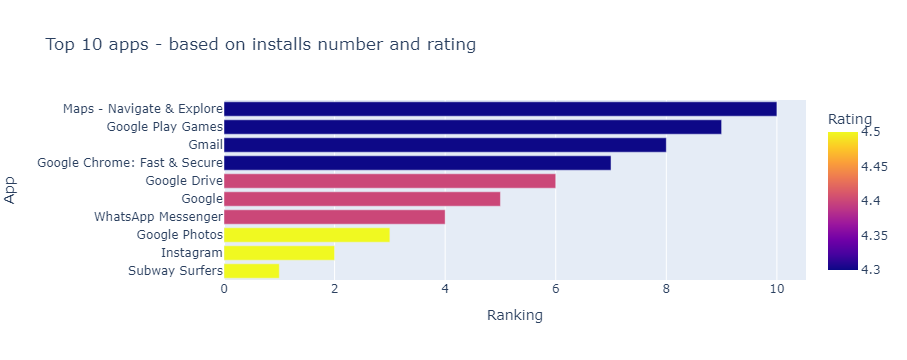

In [176]:
fig = px.bar(top_apps, x='Ranking', y='App', color='Rating', title='Top 10 apps - based on installs number and rating')
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total ascending'})
fig.show()
# installs in all of them is the same (1 000 000 000)

#### Categories of top 10 apps

In [189]:
Categories = top_apps[['Category','Ranking']].groupby('Category', as_index=False).count()
Categories = Categories.rename(columns={'Ranking':'Count'})
Categories

,Category,Count
0,COMMUNICATION,3
1,ENTERTAINMENT,1
2,GAME,1
3,PHOTOGRAPHY,1
4,PRODUCTIVITY,1
5,SOCIAL,1
6,TOOLS,1
7,TRAVEL_AND_LOCAL,1


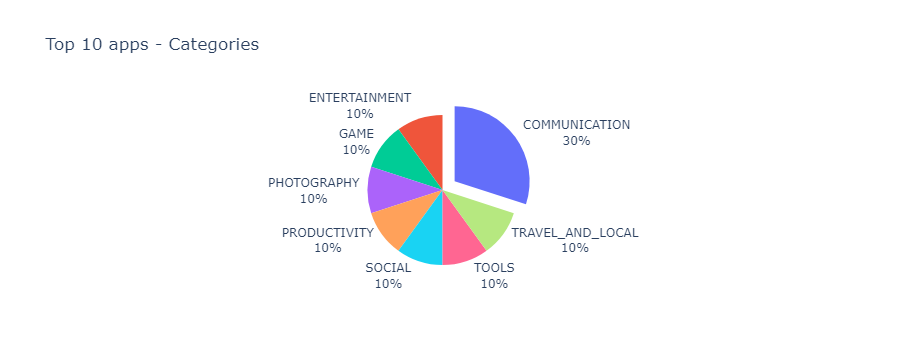

In [190]:
fig = px.pie(Categories, values='Count', names='Category', title='Top 10 apps - Categories')
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', pull=[0.2,0,0,0,0,0,0,0])
fig.update_layout(showlegend=False)
fig.show()

#### Content rating of top 10 apps

In [186]:
Content_rating = top_apps[['Content Rating', 'Ranking']].groupby('Content Rating', as_index=False).count()
Content_rating = Content_rating.rename(columns={'Ranking':'Count'})
Content_rating

,Content Rating,Count
0,Everyone,7
1,Everyone 10+,1
2,Teen,2


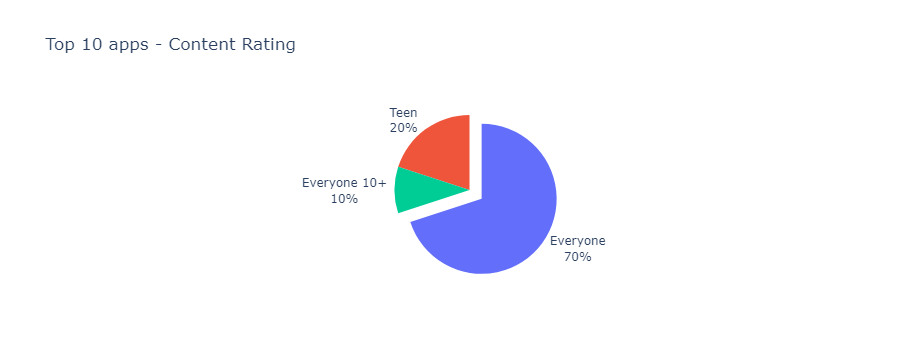

In [187]:
fig = px.pie(Content_rating, values='Count', names='Content Rating', title='Top 10 apps - Content Rating')
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textposition='outside', pull=[0.2,0,0])
fig.update_layout(showlegend=False)
fig.show()

#### Price of top 10 apps

In [179]:
top_apps[['App','Price']]
# all top 10 apps are free

,App,Price
1654,Subway Surfers,0.0
2545,Instagram,0.0
2808,Google Photos,0.0
336,WhatsApp Messenger,0.0
3234,Google,0.0
3454,Google Drive,0.0
338,Google Chrome: Fast & Secure,0.0
340,Gmail,0.0
865,Google Play Games,0.0
3117,Maps - Navigate & Explore,0.0


### Analysis of the whole dataset

#### Most Common Categories

In [180]:
overall_category = df[['Category','App']].groupby('Category',as_index=False).count()
overall_category = overall_category.sort_values('App', ascending=False)
overall_category = overall_category.head(10)
overall_category = overall_category.rename(columns={'App':'Count'})
overall_category
# interesting finding
# from the top 10 apps 3 are in the category 'Communication', but this category is not very common as it did not even
# make it to the top 10 most common categories
    # there are only 256 apps in the category 'Communication'
# Moreover, 4 categories appeared in the top 10 apps are not in the 10 most common categories
    # if you want to be the most succesfull, do not use the most common categories, find your niche
    # on the other hand, there is a great market for family, games, tools

,Category,Count
11,FAMILY,1608
14,GAME,912
29,TOOLS,718
12,FINANCE,302
18,LIFESTYLE,301
25,PRODUCTIVITY,301
23,PERSONALIZATION,298
20,MEDICAL,290
4,BUSINESS,263
24,PHOTOGRAPHY,263


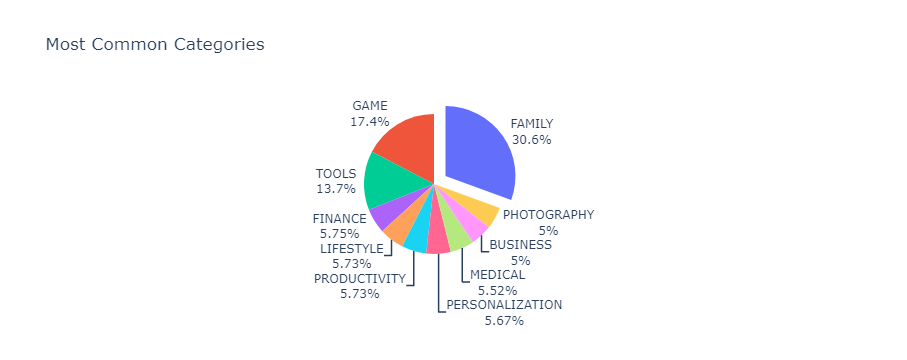

In [294]:
fig = px.pie(overall_category, values='Count', names='Category', title='Most Common Categories')
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textposition='outside', pull=[0.2])
fig.update_layout(showlegend=False)
fig.show()

In [182]:
overall_content_rating = df[['Content Rating','App']].groupby('Content Rating', as_index=False).count()
overall_content_rating = overall_content_rating.sort_values('App', ascending=False)
overall_content_rating = overall_content_rating.head(4)
overall_content_rating = overall_content_rating.rename(columns={'App':'Count'})
overall_content_rating

,Content Rating,Count
1,Everyone,6618
4,Teen,912
3,Mature 17+,357
2,Everyone 10+,305


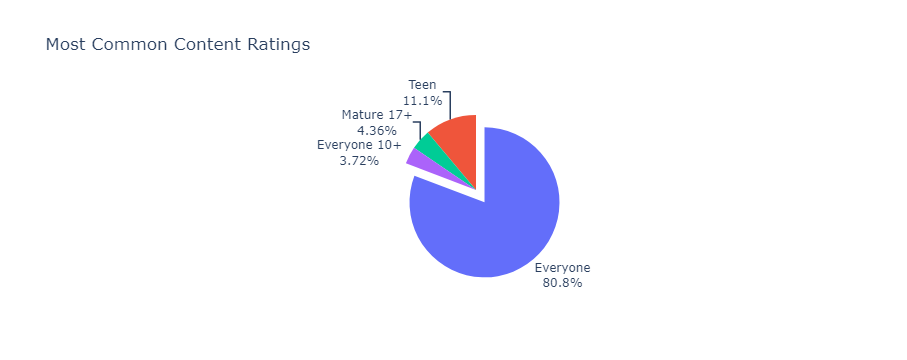

In [183]:
fig = px.pie(overall_content_rating, values='Count', names='Content Rating', title='Most Common Content Ratings')
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textposition='outside', pull=[0.2])
fig.update_layout(showlegend=False)
fig.show()

#### most apps are free

In [184]:
overall_price = df.groupby('Price', as_index=False).count().sort_values('App', ascending=False).head(10)
overall_price = overall_price[['Price', 'App']]
overall_price = overall_price.rename(columns={'App':'Count'})
overall_price
# most apps are free 

,Price,Count
0,0.00,7592
21,2.99,109
1,0.99,104
37,4.99,68
13,1.99,59
30,3.99,52
5,1.49,31
15,2.49,20
39,5.99,14
47,9.99,14


#### Distribution of prices

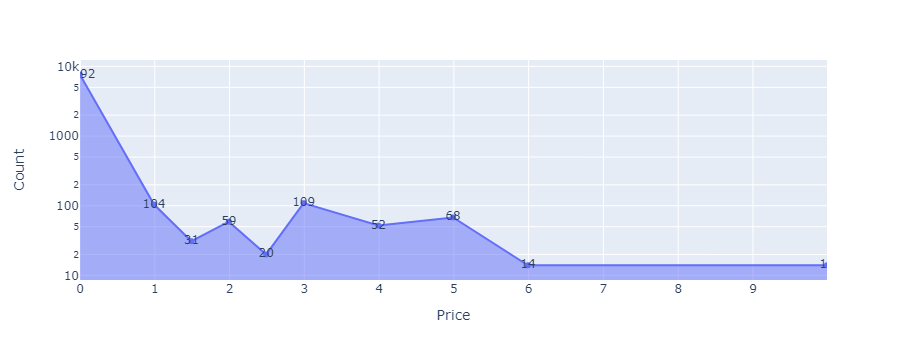

In [293]:
fig = px.area(overall_price, x='Price', y='Count', log_y=True, text='Count')
fig.show()

#### Histograms of all dataset

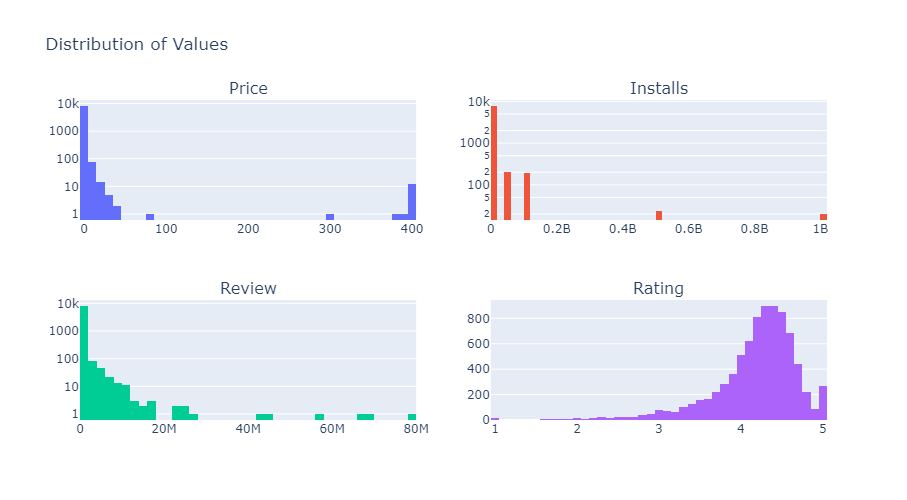

In [275]:
fig = make_subplots(rows=2, cols=2, subplot_titles=('Price','Installs','Review','Rating',))
fig.add_trace(go.Histogram(x=df['Price'], nbinsx=50), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Installs'], nbinsx=50), row=1, col=2)
fig.add_trace(go.Histogram(x=df['Reviews'], nbinsx=50), row=2, col=1)
fig.add_trace(go.Histogram(x=df['Rating']), row=2, col=2)
fig.update_layout(height=500, width=700, title_text='Distribution of Values')
fig.update_layout(showlegend=False)
fig.update_yaxes(row=1, col=1, type='log')
fig.update_yaxes(row=1, col=2, type='log')
fig.update_yaxes(row=2, col=1, type='log')
fig.show()
# majority of Price, Installs and Reviews are small amounts
# only Rating has a big average value

#### Correlation Matrix

In [53]:
df.corr()
# the only significant correlation is between Reviews and Rating

,Rating,Reviews,Installs,Price
Rating,1.000000,0.055081,0.040143,-0.021199
Reviews,0.055081,1.000000,0.624056,-0.007787
Installs,0.040143,0.624056,1.000000,-0.009652
Price,-0.021199,-0.007787,-0.009652,1.000000


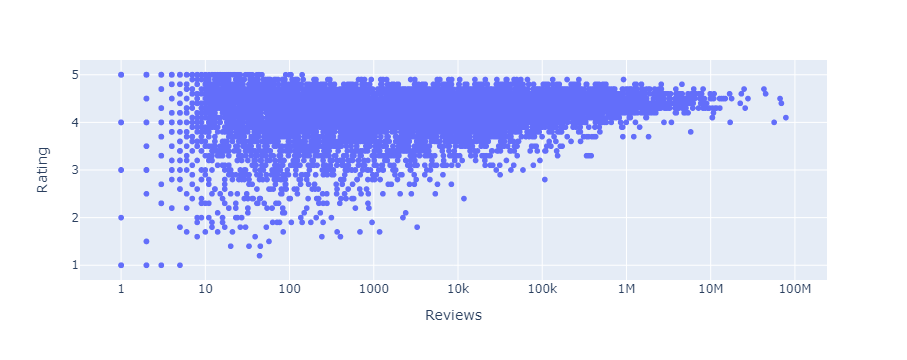

In [135]:
px.scatter(df, x='Reviews', y='Rating', log_x=True)
# higher ranking apps usually have more reviews

In [104]:
df['Category'].value_counts()

FAMILY                 1608
GAME                    912
TOOLS                   718
FINANCE                 302
PRODUCTIVITY            301
LIFESTYLE               301
PERSONALIZATION         298
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
MAPS_AND_NAVIGATION     118
EDUCATION               118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       64
HOUSE_AND_HOME           62
ART_AND_DESIGN           61
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [149]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity
